**Introduction**

*I am doing this course: [Machine Learning Practical](https://eylearning.udemy.com/machine-learning-practical) on Udemy, and I think the best way is to practice on another dataset with similar problem (classification).*

The dataset contains information about loan applicants with a German bank, where many characteristics are collected and based on that the risk (good or bad) will be categorized. 

Detailed description and source of the data can be found [here](https://www.kaggle.com/uciml/german-credit). Helpful comments are welcome.

**Step 0: Import relevant Packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt # background package for seaborn
import seaborn as sns # visualisation package based on plt
import sklearn # machine learning package
import os
print(os.listdir("../input"))


['german_credit_data.csv']


**Step 1: Import and Clean the Data**

* Using methods df.head(), df.info or df.describe() (*describe only works with numeric variables*) or df.nunique() allows us to take a glimpse at the data such as type of varibales, how many have missing data.
* Our dataset contains: 
    * dependent variable (outcome): Risk (good/bad)
    * independent variables (features): Age, Sex, Job (0->3), Housing (own/rent/free), Saving accounts, Checking account, Credit amount, Duration (month) and Purpose
* As "Saving accounts" and "Checking account" have missing values and they are not quantitative/numeric but categorical, hence we will fill these missing values with another category as "Not Available"

In [2]:
credit_df = pd.read_csv("../input/german_credit_data.csv",index_col=0)
credit_df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
credit_df = credit_df.fillna(value="not available")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
credit_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

I realise as I move along the analyse that categorical variables cause inconsistency to the plot and the model. And since our categorical variables donot vary much, for example, saving accounts have 5 categories. I will transform categorical variables (including Sex, Housing, Saving and Checking accounts, Purpose) into numerics.
* Sex: male = 1, female = 2
* Housing: own = 1, rent = 2, free = 3
* Saving account/Checking account: Not available = 0, litte = 1, moderate = 2, quite rich = 3, rich = 4
* Purpose: car = 1, furniture/equipment = 2, radio/TV = 3, domestic appliances = 4, repairs = 5, education = 6, business = 7, vacation/others = 8

I saw that sklearn.preprocessing has this class 'LabelEncoder' which will fit_transform the categorical data into numeric values, however, I find it hard to have a control understanding on to which value they will convert what. So I will do it manually with pandas. I am also aware of pandas having this method 'get_dummies' to get one-hot encodings but I am not using it either.

In [7]:
credit_df.Sex = credit_df.Sex.map({ 'male' : 1, 'female' : 2})

In [8]:
credit_df.Housing = credit_df.Housing.map({ 'own' : 1, 'rent' : 2, 'free' : 3})

In [9]:
credit_df['Saving accounts'] = credit_df['Saving accounts'].map({ 'not available' : 0, 'little' : 1, 'moderate' : 2, 'quite rich': 3, 'rich': 4})

In [10]:
credit_df['Checking account'] = credit_df['Checking account'].map({ 'not available' : 0, 'little' : 1, 'moderate' : 2, 'quite rich': 3, 'rich': 4})

In [11]:
credit_df['Purpose'] = credit_df['Purpose'].map({ 'car':1, 'furniture/equipment':2, 'radio/TV':3, 'domestic appliances':4, 'repairs':5, 'education':6, 'business':7, 'vacation/others':8})

In [12]:
credit_df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1,1169,6,3,good
1,22,2,2,1,1,2,5951,48,3,bad
2,49,1,1,1,1,0,2096,12,6,good
3,45,1,2,3,1,1,7882,42,2,good
4,53,1,2,3,1,1,4870,24,1,bad
5,35,1,1,3,0,0,9055,36,6,good
6,53,1,2,1,3,0,2835,24,2,good
7,35,1,3,2,1,2,6948,36,1,good
8,61,1,1,1,4,0,3059,12,3,good
9,28,1,3,1,1,2,5234,30,1,bad


**Step 2: Visualisation**

First, let us see the distribution of the target variable 'Risk'. We have pretty skewed data, which has more "good" than "bad". This lead to the fact that the probablity that our model predict "good" better than "bad", or outcome will be correctly guessed as "good".

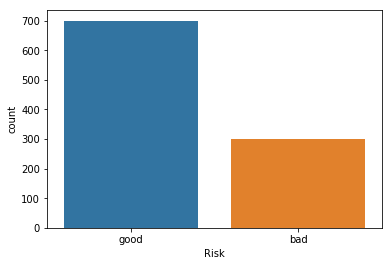

In [13]:
sns.countplot(credit_df['Risk'], label = "Count") 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


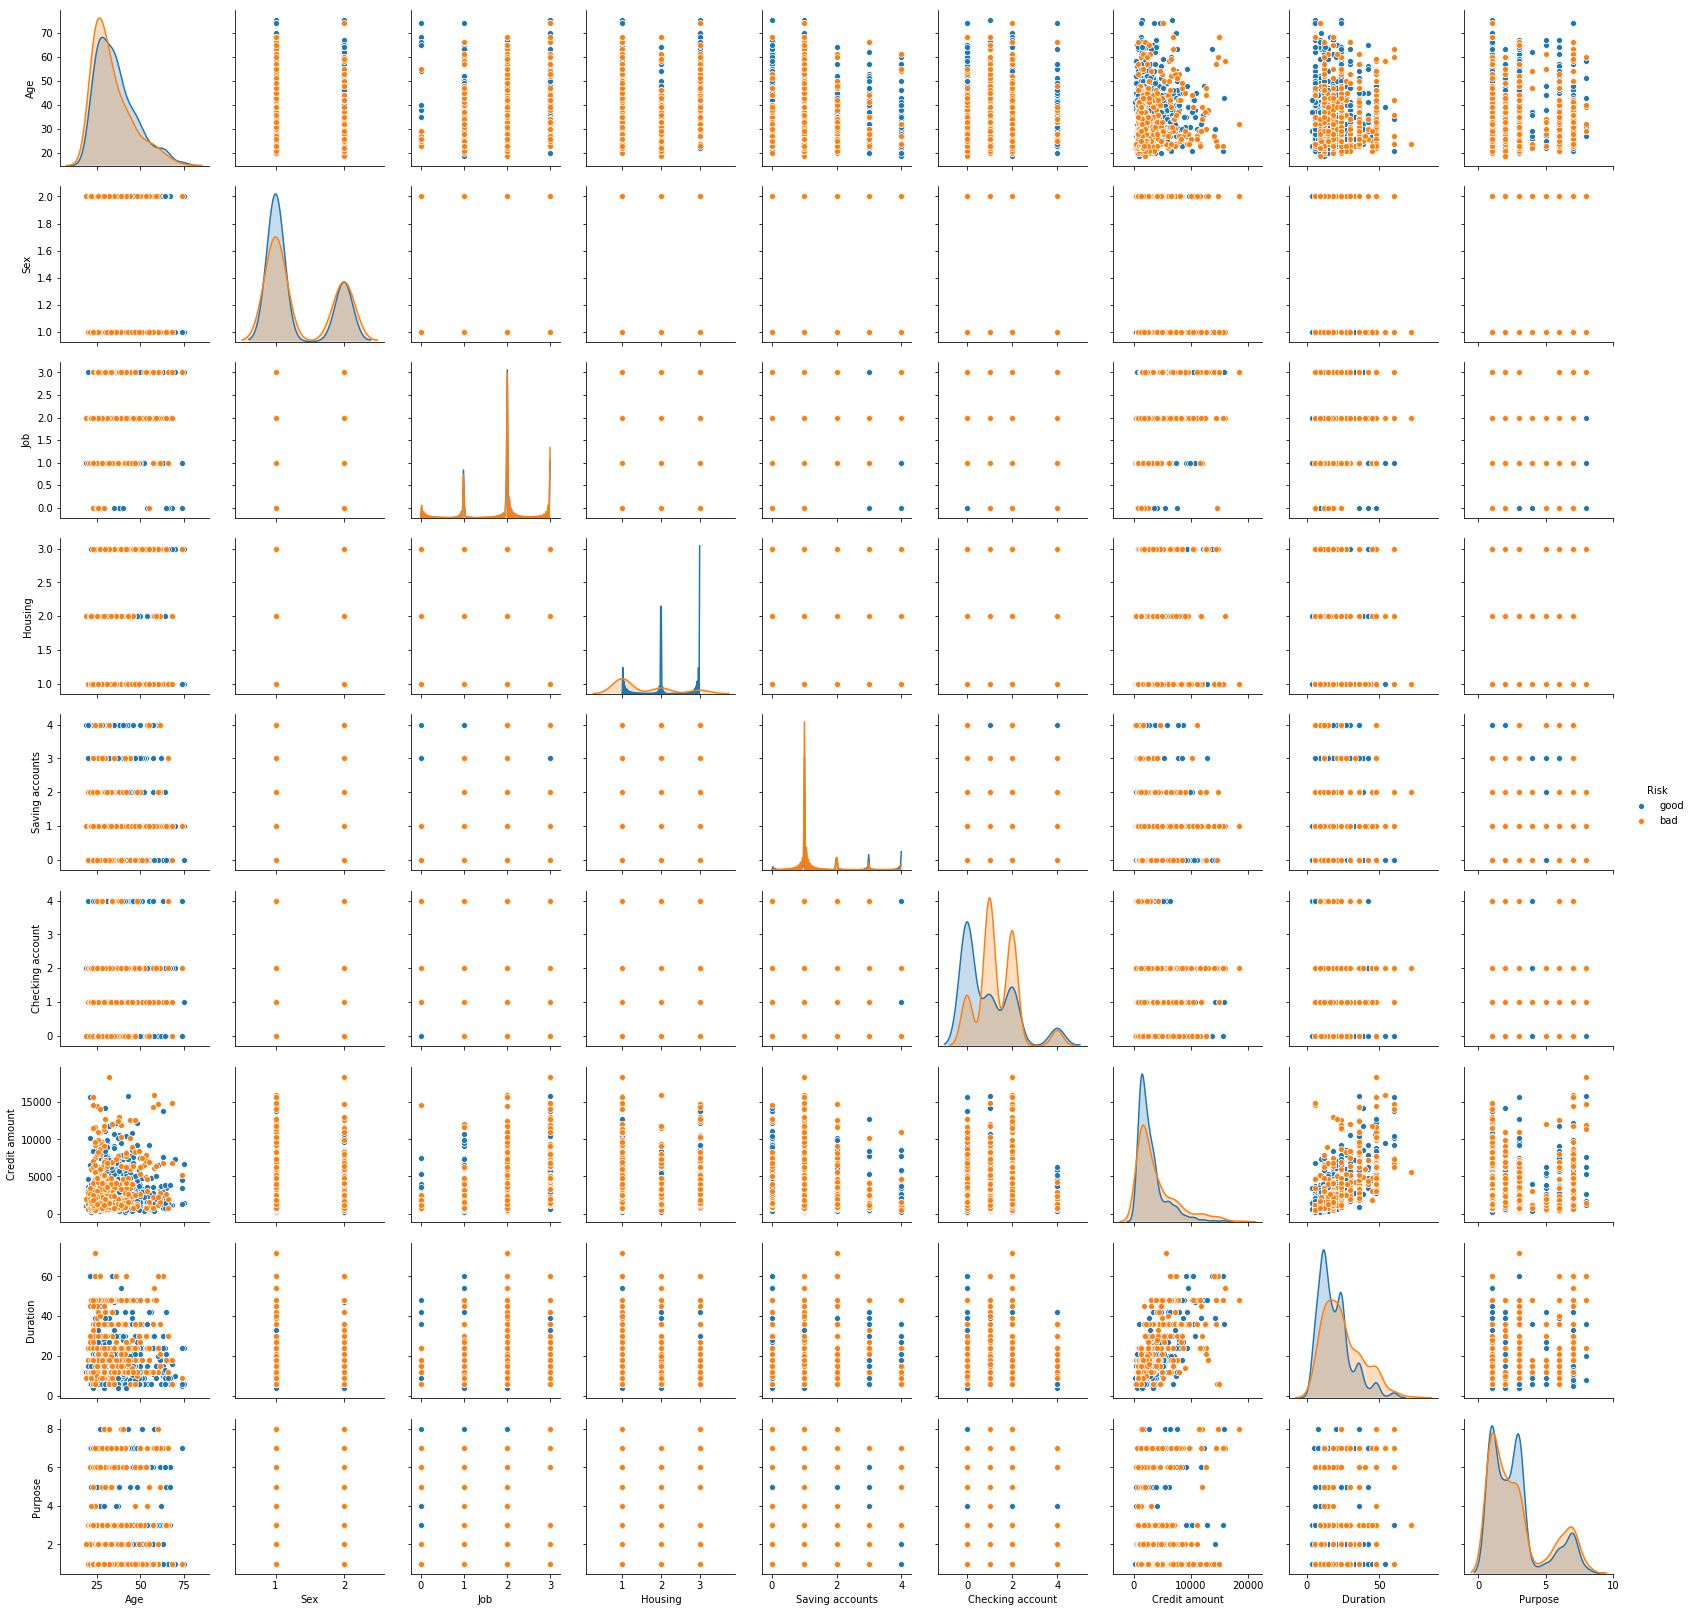

In [14]:
ax = sns.pairplot(credit_df, hue = 'Risk')

**Step 3: Model Training**

In [15]:
# Create set of only independant variables by dropping Risk
X = credit_df.drop(['Risk'], axis=1)
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,3
1,22,2,2,1,1,2,5951,48,3
2,49,1,1,1,1,0,2096,12,6
3,45,1,2,3,1,1,7882,42,2
4,53,1,2,3,1,1,4870,24,1


In [16]:
# Create a series of outcome variable only
y = credit_df['Risk']
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: Risk, dtype: object

In [17]:
# split datasets into training and test subsets for both X and y using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [18]:
print(X_train.shape)
print(X_test.shape)

(700, 9)
(300, 9)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# train the model
svc_model = SVC()
svc_model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Step 4: Evaluate the Model**

AS we can see, our model can only predict well with good clients since there are more good clients in our data than bad clients. Even though the accuracy is at 72%, as seen in the confusion matrix, it didnt score anything for the "bad" class, just exactly as we expected. 

Accuracy is to measure how well a binary classification test correctly identify the results in both classes. Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly, which is in our case). Therefore, in our case it is better if we can enhance our model in the sense that more "bad" cases are predicted correctly even if we have to trade off the lower general acccuracy. These are reflected in confusion matrix as well as in other metrics for "bad" class.


In [20]:
y_pred = svc_model.fit(X_train, y_train).predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


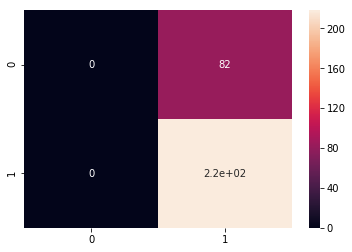

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        82
        good       0.73      1.00      0.84       218

   micro avg       0.73      0.73      0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.61       300



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7266666666666667

**Step 5: Improving the Model**

**# We try to improve the model in 2 steps:**
* First step, we will normalise our data to see if a normalised data yields better result
* Secondly, we will try to optimise the parameters in SVM function (C, gamma)

1. Normalise data

By rescaling data into the range of 0-1, we expect to remove the unit of measurements to make our data more consistent. 

The formular is:  x_new = (x - x_min) / (x_max - x_min)

In [23]:
min_train = X_train.min()
min_train

Age                  19
Sex                   1
Job                   0
Housing               1
Saving accounts       0
Checking account      0
Credit amount       338
Duration              4
Purpose               1
dtype: int64

In [24]:
range_train = (X_train - min_train).max()
range_train

Age                    56
Sex                     1
Job                     3
Housing                 2
Saving accounts         4
Checking account        4
Credit amount       18086
Duration               68
Purpose                 7
dtype: int64

In [40]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
904,0.303571,0.0,1.000000,0.0,0.25,0.0,0.051974,0.294118,0.285714
132,0.142857,0.0,0.333333,0.0,0.25,0.0,0.131041,0.161765,0.142857
942,0.214286,0.0,0.666667,0.0,0.00,0.0,0.032677,0.294118,0.142857
784,0.732143,0.0,1.000000,0.0,0.00,0.5,0.338936,0.235294,0.000000
681,0.321429,0.0,0.666667,1.0,0.00,0.0,0.107321,0.117647,0.285714


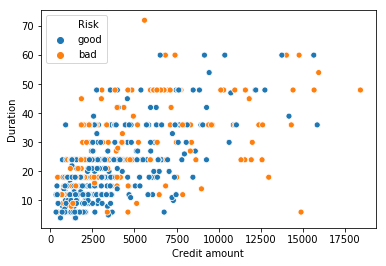

In [26]:
sns.scatterplot(x = X_train['Credit amount'], y = X_train['Duration'], hue = y_train)

In [27]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [28]:
svc_model1 = SVC()
svc_model1.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

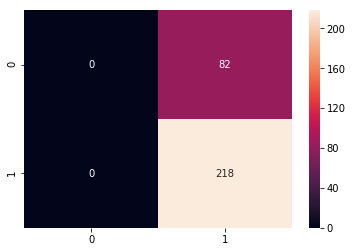

In [29]:
y_predict = svc_model1.predict(X_test_scaled)
cm1 = confusion_matrix(y_test, y_predict)

sns.heatmap(cm1,annot=True,fmt="d")

In [41]:
accuracy_score(y_test, y_predict)

0.7266666666666667

2. Optimisation of SVM Parameters

parameters gamma and C of the Radial Basis Function (RBF) kernel SVM: 

* C: trade off between misclassification and smoothness of decision boundary. Larger C (high margin) is to penalise when misclassification, smaller C (soft margin) is to be gentle to misclassfication in order to obtain a smoother boundary surface.
* Gamma: can be said to adjust the curvature of the decision boundary. Lower gamma makes the decision region broader due to low curve of the decision boundary.

In [30]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [43]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [33]:
grid.fit(X_train_scaled,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.688034188034188, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.688034188034188, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6896551724137931, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.688034188034188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.688034188034188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6896551724137931, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ................................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [34]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [35]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
grid_predictions = grid.predict(X_test_scaled)

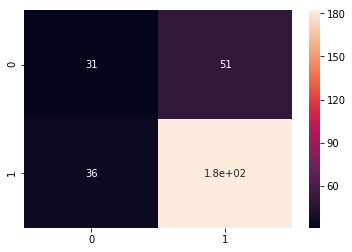

In [37]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         bad       0.46      0.38      0.42        82
        good       0.78      0.83      0.81       218

   micro avg       0.71      0.71      0.71       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.69      0.71      0.70       300



In [42]:
accuracy_score(y_test, grid_predictions)

0.71

As we have selected the best parameters for SVM model, we are able to perform better in correcly classifying more "bad" creditors, this is for the bank better than correctly classifying "good" creditors, since "good creditors" will pay the debt anyway, and identifying "bad creditors" will help create better risk adjustment methods on such clients in terms of extra deposit or another guarantee. 

Food for thought: applying one model is not enough, we have to compare different models to see which one scores better, find enhancements on those models and compare them again. Furthermore, maybe it is not necessary to include all features in the model, but to select those are relevant?